In [ ]:
#| default_exp visuals
from nbdev import *
from nbdev.showdoc import *
import networkx as nx

# Visualisations

> A collection of somewhat handy functions to make your AoC puzzle life solving a bit easier

In [ ]:
#| exporti
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import animation, rc

In [ ]:
#| export
cat = ''.join
def visualize_graph(edges:set, labels=None):
    '''
    Plots graph.
    edges: set with tuples (fromnode, tonode)
    labels: optional dictionary with node descriptions. If None, the node variable names will be used

    If the names are passed and the node is not found, 'Missing'will be appended in the label
    
    Usage example:
        from aocutils.special import visualize_graph, labelize
        visualize_graph(edges, labelize(lines))
    '''
    missing = 'Missing'
    if not labels: 
        labels = {}
        missing = ''

    G = nx.DiGraph()
    for k,v in edges:
    

        # weight = 'jmp' if lines[k][0].startswith('j') else ''
        weight = ''
        G.add_edge(labels.get(k, missing+str(k)), labels.get(v, missing+str(v)), weight=weight)
    # color_map = [party_colors[node] for node in G]
    pos = nx.nx_agraph.graphviz_layout(G,prog='neato', args ='')
    plt.figure(figsize=(32,18))
    nx.draw_networkx(G, pos,font_size=12, node_color='y')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.5, font_size=12)
    plt.margins(0.1,0.1)

def labelize(lines):
    '''
    Returns a dict with index, description
    Specifically for list of instructions to turn them into strings, preceded by their index
    E.g.
    labels[3] = '3jmpa'
    '''
    return {idx:''.join([str(idx)]+line) for idx, line in enumerate(lines)}

Here is a guide how to install pygraphviz

https://pygraphviz.github.io/documentation/stable/install.html

python -m pip install --global-option=build_ext --global-option="-IC:\Program Files\Graphviz\include" --global-option="-LC:\Program Files\Graphviz\lib" pygraphviz

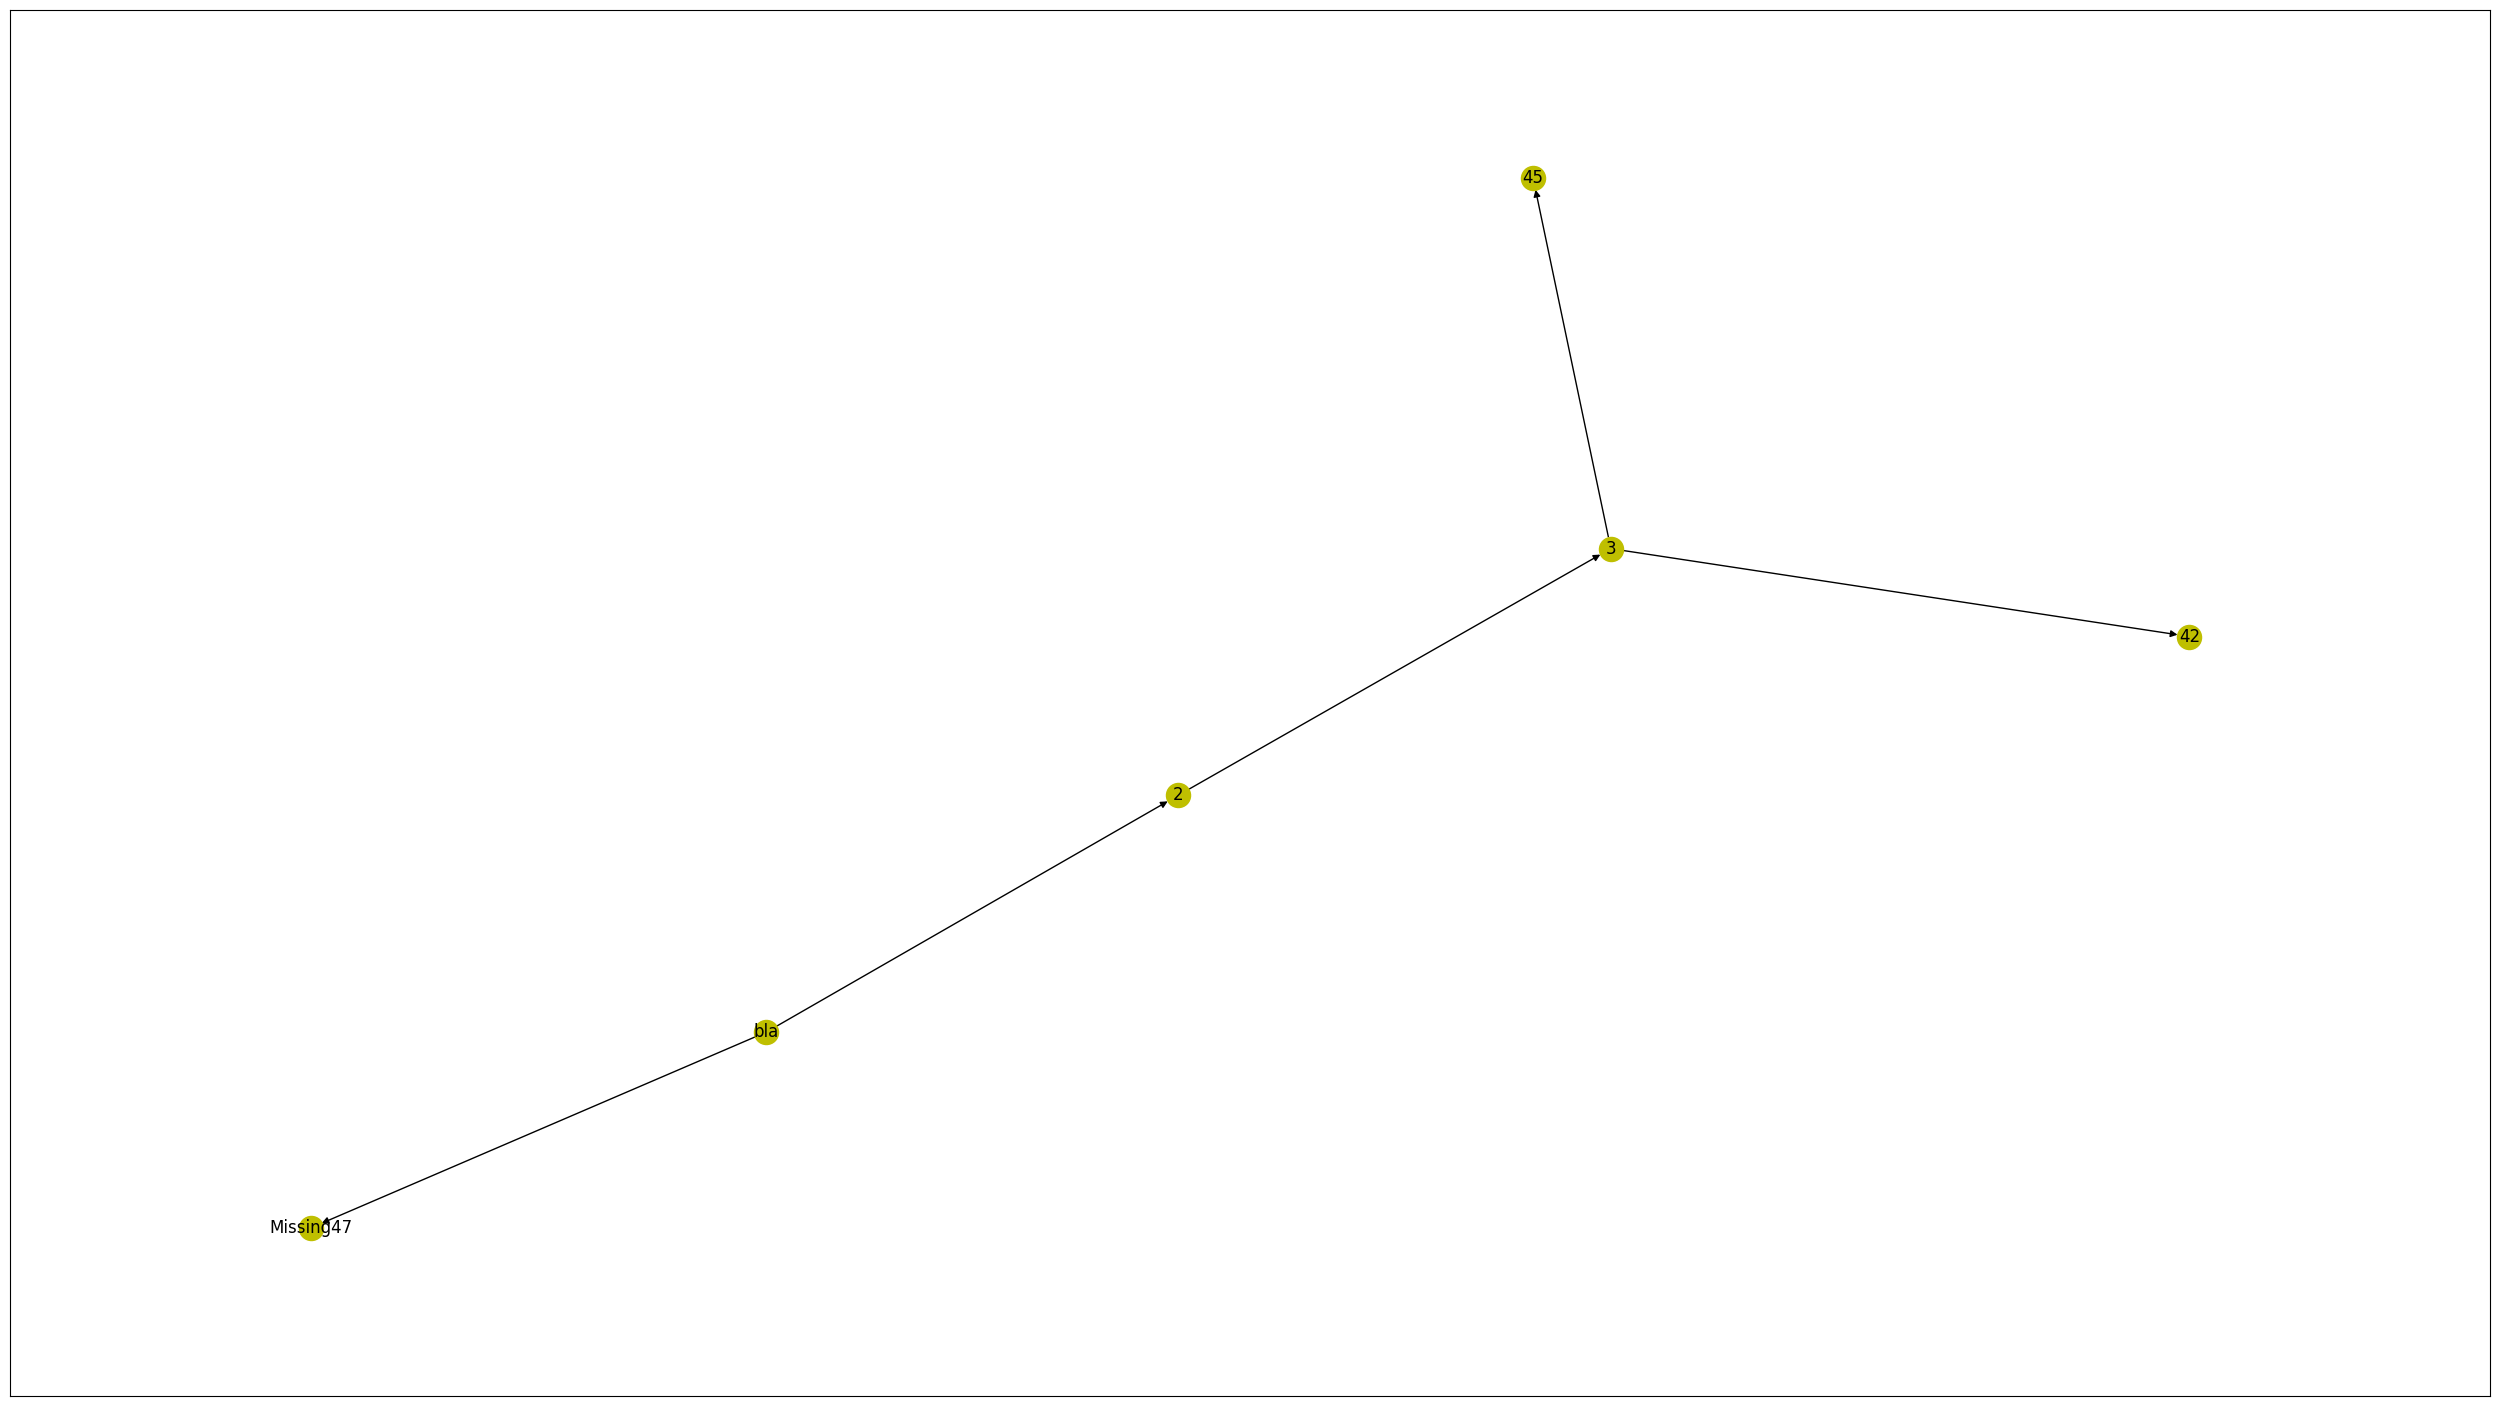

In [ ]:
edges = {(39, 40), (39, 47), (40, 41), (41, 42), (41, 45)}
labels = {39: 'bla',
             40: '2',
             41: '3',
             42: '42',
             45: '45'}
visualize_graph(edges, labels)

In [ ]:
#| export
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/
def animate_grid(
    arr, # Numpy arr, e.g. np.random.rand(36).reshape((6,6))
    step): # Function called with a counter, should return new grid, e.g. return np.random.rand(36).reshape((6,6))
    # Animates a grid
    def update_fn(i):
        matrice.set_array(step(i))
    fig, ax = plt.subplots(figsize=(15,15))
    matrice = ax.matshow(arr)
    plt.colorbar(matrice)
    anim =  animation.FuncAnimation(fig, update_fn)
    # anim._repr_html_() is None
    rc('animation', html='jshtml')
    return HTML(anim.to_jshtml())


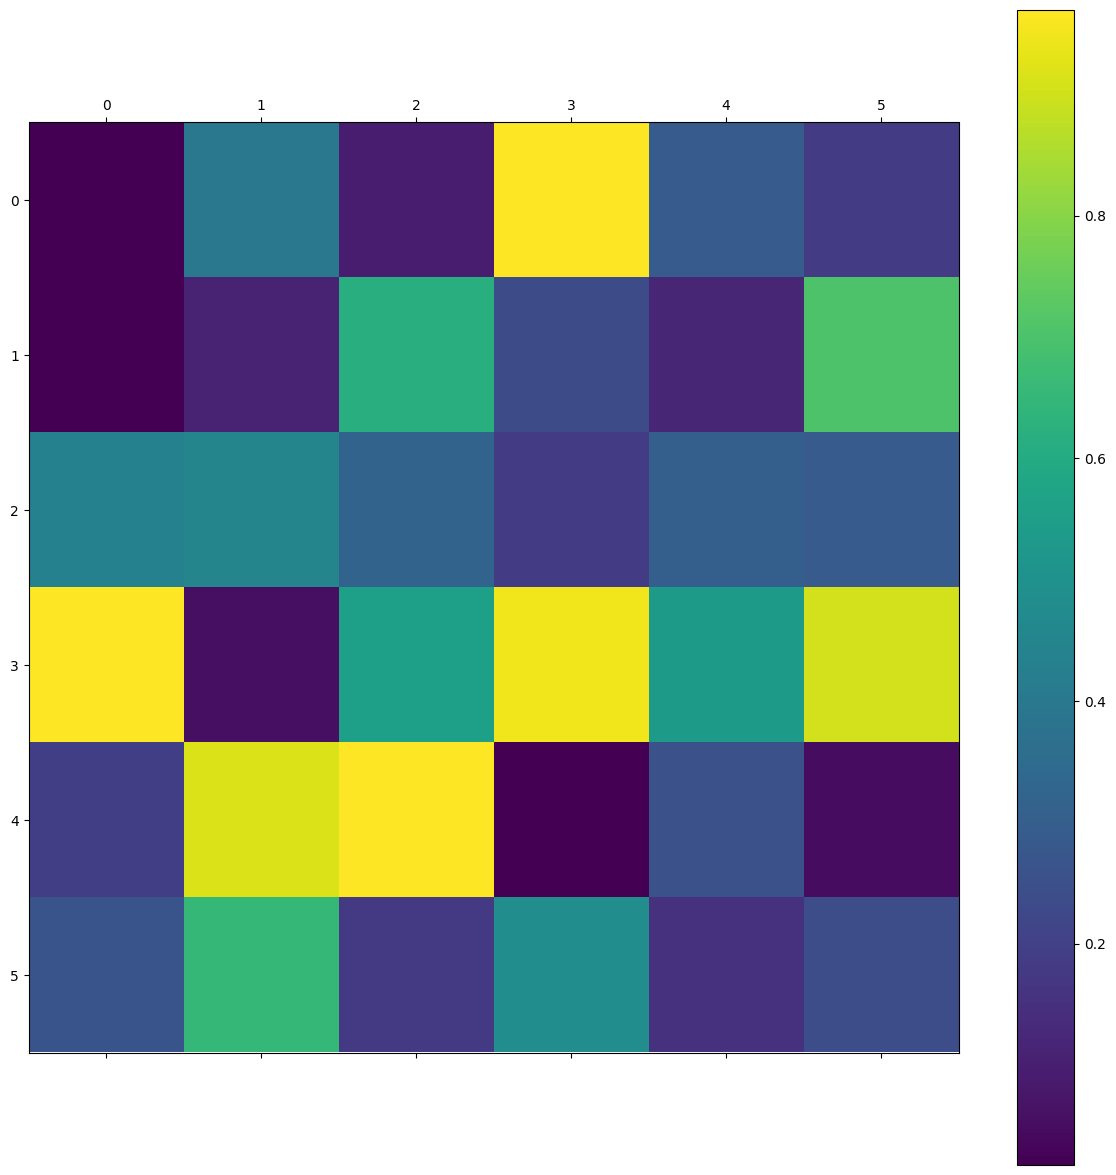

In [ ]:
def step(i):
    return np.random.rand(36).reshape((6,6))

arr = np.random.rand(36).reshape((6,6))
animate_grid(arr, step)

In [ ]:
# | export
def plot(grid):
    if isinstance(grid, list):
        grid = np.array(grid)
    plt.imshow(grid)

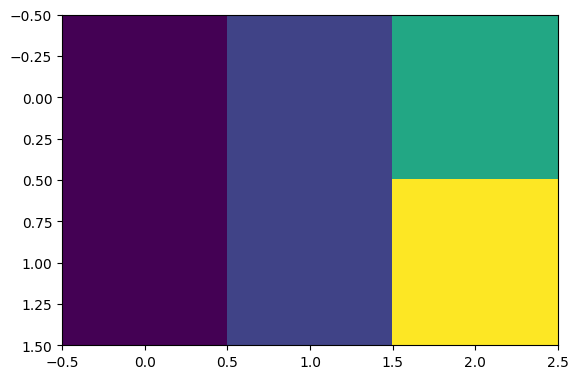

In [ ]:
test = [[1,2,4],[1,2,6]]
plot(test)
